In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('processed_data.csv')

Forecasting Model

C:\Users\HP\AppData\Local\Temp\ipykernel_17464\2057348876.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour  # Extract hour from time


Accuracy: 13.85%


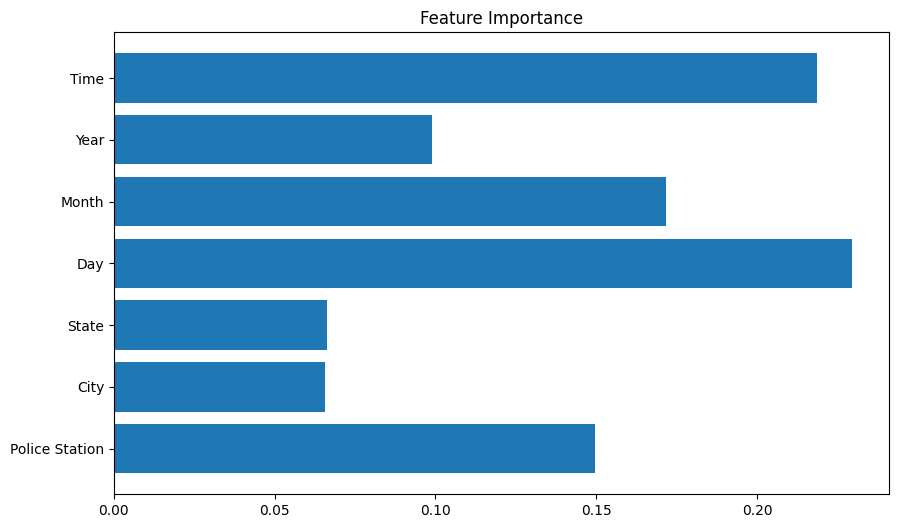

In [2]:
# Convert 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.hour  # Extract hour from time

# Extract day, month, year from 'Date'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Encode categorical columns
le = LabelEncoder()
df['Police Station'] = le.fit_transform(df['Police Station'])
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Crime Type'] = le.fit_transform(df['Crime Type'])

# Select features and target variable
X = df[['Police Station', 'City', 'State', 'Day', 'Month', 'Year', 'Time']]
y = df['Crime Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature importance visualization
importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance')
plt.show()